<a href="https://colab.research.google.com/github/AmirDice/anomalydeteccdn/blob/master/LSTM_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [22]:
from google.colab import files
import io

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['dst.csv']))
data.head()

Saving dst.csv to dst (1).csv


,timestamp,Status code,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,...,geo-location,Live channel,devicemodel,devicebrand,Host,method,assetnumber,hit,cachename,uid
0,14/05/2088 23:07,206,video/mp4,HTTP/1.1,13392.936510,0.000150,0.000689,31536000.0,0.0,153806.0,...,773.0,NaN,NaN,NaN,4.0,GET,253.0,hit,0.0,NaN
1,16/05/2088 02:43,502,text/html,HTTP/1.1,2.634921,0.020632,0.020684,NaN,1.0,165279.0,...,1.0,1.0,0.0,0.0,1.0,GET,NaN,miss,0.0,7611.0
2,18/05/2088 19:05,403,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/05/2088 20:25,412,text/html,HTTP/1.1,23.888889,0.014797,0.014842,NaN,NaN,207847.0,...,0.0,60.0,NaN,NaN,7.0,GET,NaN,miss,0.0,NaN
4,16/05/2088 04:08,412,text/html,HTTP/1.1,23.888889,0.014794,0.014847,NaN,0.0,234088.0,...,1633.0,60.0,NaN,NaN,7.0,GET,NaN,miss,0.0,NaN


In [23]:
data

,timestamp,Status code,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,...,geo-location,Live channel,devicemodel,devicebrand,Host,method,assetnumber,hit,cachename,uid
0,14/05/2088 23:07,206,video/mp4,HTTP/1.1,13392.936510,0.000150,0.000689,31536000.0,0.0,153806.0,...,773.0,NaN,NaN,NaN,4.0,GET,253.0,hit,0.0,NaN
1,16/05/2088 02:43,502,text/html,HTTP/1.1,2.634921,0.020632,0.020684,NaN,1.0,165279.0,...,1.0,1.0,0.0,0.0,1.0,GET,NaN,miss,0.0,7611.0
2,18/05/2088 19:05,403,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/05/2088 20:25,412,text/html,HTTP/1.1,23.888889,0.014797,0.014842,NaN,NaN,207847.0,...,0.0,60.0,NaN,NaN,7.0,GET,NaN,miss,0.0,NaN
4,16/05/2088 04:08,412,text/html,HTTP/1.1,23.888889,0.014794,0.014847,NaN,0.0,234088.0,...,1633.0,60.0,NaN,NaN,7.0,GET,NaN,miss,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,18/05/2088 19:36,405,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90060,18/05/2088 13:17,412,text/html,HTTP/1.1,23.888889,0.007524,0.007606,NaN,0.0,831914.0,...,5264.0,60.0,NaN,NaN,7.0,GET,NaN,miss,1.0,NaN
90061,16/05/2088 20:20,404,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90062,13/05/2088 09:18,200,application/zip,HTTP/1.1,15.079365,0.000120,0.000179,300.0,0.0,3830.0,...,1.0,NaN,NaN,NaN,0.0,GET,NaN,hit,0.0,NaN


In [24]:
data.isnull().sum()

timestamp               0
Status code             0
contenttype          5141
protocol            31803
contentlength       31803
timefirstbyte       32936
timetoserv          31803
maxage              57173
osfamily            36091
sid                 32936
cachecontrol        31803
uamajor             62018
uafamily            36091
devicefamily        36091
fragment            31803
path                31803
Content Package     83891
geo-location        32966
Live channel        59913
devicemodel         61948
devicebrand         61948
Host                32936
method              31905
assetnumber         83891
hit                 32936
cachename           31803
uid                 74240
dtype: int64

let us drop the columns which consist extremely more null values than others

In [25]:
data = data.drop(['assetnumber','Content Package '], axis=1)

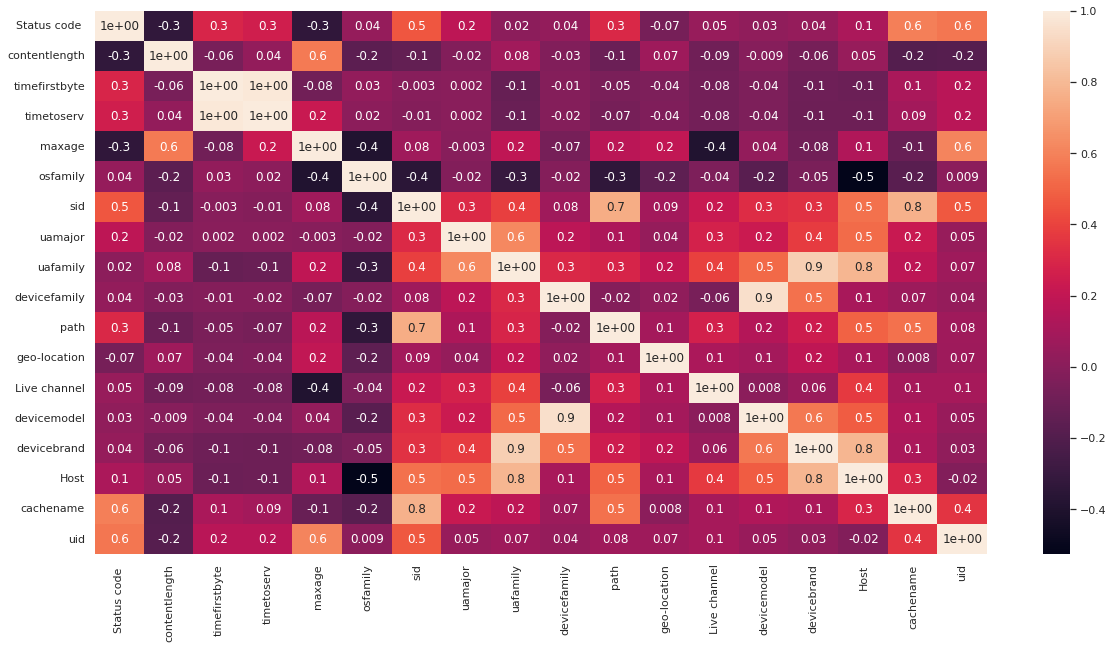

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
#figure size
plt.figure(figsize=(20, 10))
#heat map for correlation coefficient
sns.heatmap(data.corr(), annot=True, fmt="0.1")

As you can see, most features are correlated with each other to some degree but some have very low correlations such as timetoserv , osfamily,and timefirstbyte.

In [27]:
data.columns

Index(['timestamp', 'Status code ', 'contenttype', 'protocol', 'contentlength',
       'timefirstbyte', 'timetoserv', 'maxage', 'osfamily', 'sid',
       'cachecontrol', 'uamajor', 'uafamily', 'devicefamily', 'fragment',
       'path', 'geo-location', 'Live channel', 'devicemodel', 'devicebrand',
       'Host', 'method', 'hit', 'cachename', 'uid'],
      dtype='object')

In [28]:
data = data.drop(['uid','cachename','hit','Host','devicemodel','geo-location','fragment','cachecontrol','sid','maxage','contenttype'], axis=1)

In [29]:
data=data.fillna(data.mode().iloc[0])

In [30]:
data.dtypes

timestamp         object
Status code        int64
protocol          object
contentlength    float64
timefirstbyte    float64
timetoserv       float64
osfamily         float64
uamajor          float64
uafamily         float64
devicefamily     float64
path             float64
Live channel     float64
devicebrand      float64
method            object
dtype: object

In [31]:
data.isnull().sum()

timestamp        0
Status code      0
protocol         0
contentlength    0
timefirstbyte    0
timetoserv       0
osfamily         0
uamajor          0
uafamily         0
devicefamily     0
path             0
Live channel     0
devicebrand      0
method           0
dtype: int64

In [32]:
data['timestamp'] =  pd.to_datetime(data['timestamp'])

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['protocol']]).toarray())
df2 = data.join(encoder_df)
df2.drop('protocol', axis=1, inplace=True)


In [34]:
df2

,timestamp,Status code,contentlength,timefirstbyte,timetoserv,osfamily,uamajor,uafamily,devicefamily,path,Live channel,devicebrand,method,0,1
0,2088-05-14 23:07:00,206,13392.936510,0.000150,0.000689,0.0,3.0,12.0,0.0,3931298.0,60.0,1.0,GET,0.0,1.0
1,2088-05-16 02:43:00,502,2.634921,0.020632,0.020684,1.0,1.0,2.0,1.0,92.0,1.0,0.0,GET,0.0,1.0
2,2088-05-18 19:05:00,403,0.000000,0.000139,0.000000,0.0,3.0,12.0,0.0,42.0,60.0,1.0,GET,0.0,1.0
3,2088-05-15 20:25:00,412,23.888889,0.014797,0.014842,0.0,3.0,12.0,0.0,21936373.0,60.0,1.0,GET,0.0,1.0
4,2088-05-16 04:08:00,412,23.888889,0.014794,0.014847,0.0,3.0,12.0,0.0,25178360.0,60.0,1.0,GET,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,2088-05-18 19:36:00,405,0.000000,0.000139,0.000000,0.0,3.0,12.0,0.0,42.0,60.0,1.0,GET,0.0,1.0
90060,2088-05-18 13:17:00,412,23.888889,0.007524,0.007606,0.0,3.0,12.0,0.0,70637996.0,60.0,1.0,GET,0.0,1.0
90061,2088-05-16 20:20:00,404,0.000000,0.000139,0.000000,0.0,3.0,12.0,0.0,42.0,60.0,1.0,GET,0.0,1.0
90062,2088-05-13 09:18:00,200,15.079365,0.000120,0.000179,0.0,0.0,0.0,0.0,1.0,60.0,1.0,GET,0.0,1.0


Let us find low variance features:

In [35]:
(data
 .select_dtypes(include=np.number)
 .var()
 .astype('str'))

Status code       9279.603242728685
contentlength    138492061.21555722
timefirstbyte     1.985407602178516
timetoserv        2.028892929147892
osfamily         1.6168784591306407
uamajor          17.993762053442044
uafamily         40.603667628274195
devicefamily     1446.6667374269045
path             473732308477686.25
Live channel     478.69819727074855
devicebrand       2.395962107233962
dtype: object

In [36]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['method']]).toarray())
df2 = data.join(encoder_df)
df2.drop('method', axis=1, inplace=True)

In [37]:
data.method.unique()

array(['GET', '-'], dtype=object)

In [38]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from tensorflow import keras
import tensorflow as tf

from sklearn.preprocessing import StandardScaler

import plotly.graph_objects as go

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.9.2


In [45]:
df2['timestamp'].min(), df2['timestamp'].max()

(Timestamp('2088-05-13 07:00:00'), Timestamp('2088-05-19 07:01:00'))

In [46]:
df = df2[['timestamp', 'timetoserv']]

In [47]:
df

,timestamp,timetoserv
0,2088-05-14 23:07:00,0.000689
1,2088-05-16 02:43:00,0.020684
2,2088-05-18 19:05:00,0.000000
3,2088-05-15 20:25:00,0.014842
4,2088-05-16 04:08:00,0.014847
...,...,...
90059,2088-05-18 19:36:00,0.000000
90060,2088-05-18 13:17:00,0.007606
90061,2088-05-16 20:20:00,0.000000
90062,2088-05-13 09:18:00,0.000179


In [48]:
train, test = df.loc[df['timestamp'] <= '2088-05-15'], df.loc[df['timestamp'] > '2088-05-15']

In [49]:
scaler = StandardScaler()
scaler = scaler.fit(train[['timetoserv']])

train['timetoserv'] = scaler.transform(train[['timetoserv']])
test['timetoserv'] = scaler.transform(test[['timetoserv']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train[['timetoserv']], train['timetoserv'])
X_test, y_test = create_sequences(test[['timetoserv']], test['timetoserv'])

In [51]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 1)            129       
 ibuted)                                                

In [52]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/2
1136/1136 [==============================] - 106s 89ms/step - loss: 0.1959 - val_loss: 0.1805
Epoch 2/2
1136/1136 [==============================] - 103s 91ms/step - loss: 0.1921 - val_loss: 0.1800


In [53]:
model.evaluate(X_test, y_test)

1551/1551 [==============================] - 50s 33ms/step - loss: 1.2797


1.2796564102172852

Reconstruction error threshold: 1.804850189031593


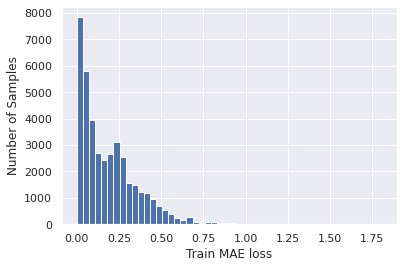

In [54]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

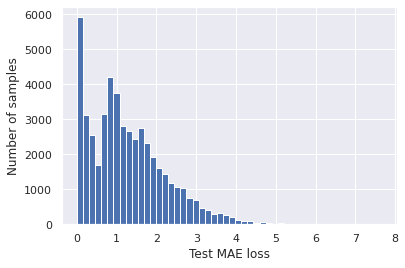

In [55]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

In [64]:
anomaly_df = pd.DataFrame(test[TIME_STEPS:])
max_trainMAE = 0.3 
anomaly_df['test_mae_loss'] = test_mae_loss
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['test_mae_loss'] > anomaly_df['max_trainMAE']
anomaly_df['timetoserv'] = test[TIME_STEPS:]['timetoserv']


1551/1551 [==============================] - 51s 33ms/step


(array([8.166e+03, 3.979e+03, 4.281e+03, 7.008e+03, 4.566e+03, 4.278e+03,
        4.378e+03, 3.212e+03, 2.457e+03, 1.951e+03, 1.551e+03, 1.261e+03,
        7.450e+02, 5.360e+02, 4.710e+02, 2.870e+02, 1.610e+02, 1.010e+02,
        1.010e+02, 3.400e+01, 4.400e+01, 1.800e+01, 1.000e+01, 1.300e+01,
        1.100e+01, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([5.11914776e-03, 2.59954980e-01, 5.14790813e-01, 7.69626646e-01,
        1.02446248e+00, 1.27929831e+00, 1.53413414e+00, 1.78896998e+00,
        2.04380581e+00, 2.29864164e+00, 2.55347747e+00, 2.80831331e+00,
        3.06314914e+00, 3.31798497e+00, 3.57282081e+00, 3.82765664e+00,
        4.08249247e+00, 4.33732830e+00, 4.59216414e+00, 4.84699997e+00,
        5.10183580e+00, 5.35667163e+00, 5.61150747e+00, 5.86634330e+00,
        6.12117913e+00, 6.37601497e+00, 6.63085080e+00, 6.88568663e+00,
        7.14052246e+00, 7.39535830e+00, 7.65019413e+00]),
 <a list of 30 Patch objects>)

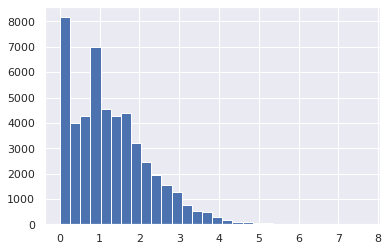

In [65]:
testPredict = model.predict(X_test)
testMAE = np.mean(np.abs(testPredict - X_test), axis=1)
plt.hist(testMAE, bins=30)

In [66]:
anomaly_df = pd.DataFrame(test[TIME_STEPS:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['timetoserv'] = test[TIME_STEPS:]['timetoserv']

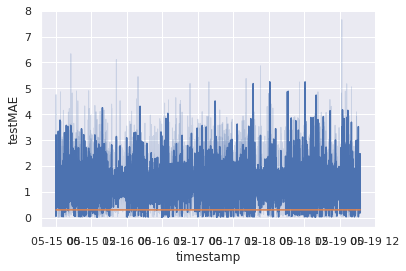

In [67]:
sns.lineplot(x=anomaly_df['timestamp'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['timestamp'], y=anomaly_df['max_trainMAE'])

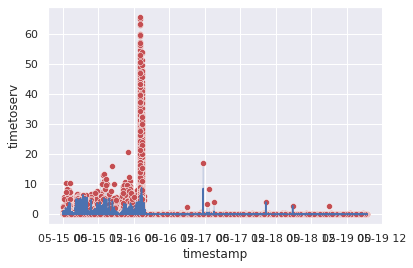

In [73]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

#Plot anomalies
sns.lineplot(x=anomaly_df['timestamp'], y=anomaly_df['timetoserv'])
sns.scatterplot(x=anomalies['timestamp'], y=anomalies['timetoserv'], color='r')

In [56]:
test_score_df = pd.DataFrame(test[TIME_STEPS:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['timetoserv'] = test[TIME_STEPS:]['timetoserv']

In [57]:
test_score_df.tail()

,timestamp,timetoserv,loss,threshold,anomaly
90058,2088-05-17 08:02:00,-0.098345,0.033064,1.80485,False
90059,2088-05-18 19:36:00,-0.190494,0.036107,1.80485,False
90060,2088-05-18 13:17:00,-0.168847,0.029542,1.80485,False
90061,2088-05-16 20:20:00,-0.190494,0.030229,1.80485,False
90063,2088-05-17 22:41:00,-0.025592,0.030231,1.80485,False


In [59]:
anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
anomalies.head()

,timestamp,timetoserv,loss,threshold,anomaly
99,2088-05-15 11:52:00,0.095363,3.054260,1.80485,True
103,2088-05-16 06:02:00,-0.190494,3.063398,1.80485,True
110,2088-05-18 22:21:00,-0.040224,3.063453,1.80485,True
111,2088-05-16 02:15:00,-0.148693,3.067220,1.80485,True
112,2088-05-15 21:47:00,-0.189572,3.068587,1.80485,True


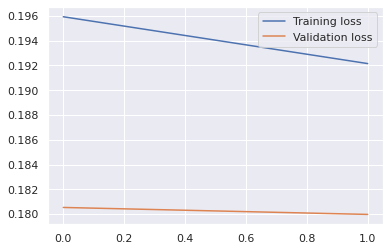

In [60]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();